In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import shutil

In [2]:
DATA_LOC = pathlib.Path('../data/')

RAW_LOC = DATA_LOC / 'raw'
FILTERED_LOC = DATA_LOC / 'filtered'

In [3]:
grade1 = RAW_LOC / 'grade1'
grade2 = RAW_LOC / 'grade2'

# DATA CHECK

## GRADE 1

In [4]:
img_g1_fp = grade1 / 'image'
label_g1_fp = grade1 / 'label.csv'

In [5]:
fn_img_g1 = list(img_g1_fp.iterdir())
fn_img_g1 = [i.parts[-1].split('.')[0] for i in fn_img_g1 if '.jpeg' in str(i.parts[-1])]

In [6]:
label_g1 = pd.read_csv(label_g1_fp, index_col=0)
fn_label_g1 = label_g1['id'].tolist()

In [7]:
len(fn_img_g1), len(fn_label_g1)

(864, 864)

In [8]:
len(set(fn_img_g1) & set(fn_label_g1))

864

In [9]:
fn_g1 = list(set(fn_img_g1) & set(fn_label_g1))
len(fn_g1)

864

## GRADE 2

In [10]:
img_g2_fp = grade2 / 'image'
label_g2_fp = grade2 / 'label.csv'

In [11]:
fn_img_g2 = list(img_g2_fp.iterdir())
fn_img_g2 = [i.parts[-1].split('.')[0] for i in fn_img_g2 if '.jpeg' in str(i.parts[-1])]

In [12]:
label_g2 = pd.read_csv(label_g2_fp, index_col=0)
fn_label_g2 = label_g2['id'].tolist()

In [13]:
len(fn_img_g2), len(fn_label_g2)

(867, 867)

In [14]:
len(set(fn_img_g2) & set(fn_label_g2))

867

In [15]:
fn_g2 = list(set(fn_img_g2) & set(fn_label_g2))
len(fn_g2)

867

## Merge GRADE 1 & 2 TOGETHER

In [16]:
len(set(fn_g1) & set(fn_g2))

0

In [17]:
fn_grade = fn_g1 + fn_g2
len(fn_grade), fn_grade[:3]

(1731,
 ['ckln58gfd00cy3t5lzbmrz7tz',
  'cklp6xfjw002l3b68sb4tsw1t',
  'cklnet57800b33b680av5qm1e'])

In [18]:
filtered_grade_fp = FILTERED_LOC / 'grade'
image_filtered_grade_fp = filtered_grade_fp / 'image'

In [19]:
# Copy raw grade1 to filtered_grade_fp
records = []
for fn in fn_g1[:]:
    # Image
    src_img_g1_fn = str(img_g1_fp / (fn + '.jpeg'))
    dst_image_filter_fp = str(image_filtered_grade_fp / (fn +'.jpeg'))
    # shutil.copy(src_img_g1_fn, dst_image_filter_fp)
    records.append((fn, src_img_g1_fn, dst_image_filter_fp))

# Copy raw grade2 to filtered_grade_fp
for fn in fn_g2[:]:
    # Image
    src_img_g2_fn = str(img_g2_fp / (fn + '.jpeg'))
    dst_image_filter_fp = str(image_filtered_grade_fp / (fn +'.jpeg'))
    # shutil.copy(src_img_g2_fn, dst_image_filter_fp)
    records.append((fn, src_img_g2_fn, dst_image_filter_fp))
    
record_df = pd.DataFrame(data=records, columns=['filename','raw_img', 'filtered_img'])

In [20]:
len(record_df)

1731

In [21]:
filtered_label_df = pd.concat([label_g1[['id','classification']],label_g2[['id','classification']]], ignore_index=True)
filtered_label_df.columns = ['filename', 'label']

In [22]:
len(filtered_label_df)

1731

In [23]:
record_df = filtered_label_df.merge(record_df, how='inner', left_on='filename', right_on='filename')
len(record_df)

1731

In [27]:
record_df ['label'].unique()

array(['1', '2', '4', '3', '0', nan, 'low_image_quality',
       "image_quality_is_too_low,_doctor_can't_grade_acne_severity_with_high_confidence_",
       "image_quality_is_too_low,_doctor_can't_grade_acne_severity_with_high_confidence"],
      dtype=object)

In [29]:
record_df ['label'].value_counts(dropna=False)

label
0                                                                                   630
1                                                                                   567
2                                                                                   318
3                                                                                   110
4                                                                                    42
image_quality_is_too_low,_doctor_can't_grade_acne_severity_with_high_confidence      35
NaN                                                                                  22
image_quality_is_too_low,_doctor_can't_grade_acne_severity_with_high_confidence_      4
low_image_quality                                                                     3
Name: count, dtype: int64

In [32]:
record_df = record_df[record_df['label'].isin(['0', '1','2','3','4'])]

In [33]:
record_df['label'] = record_df['label'].astype(int)

In [34]:
record_df ['label'].value_counts(dropna=False)

label
0    630
1    567
2    318
3    110
4     42
Name: count, dtype: int64

<Axes: ylabel='count'>

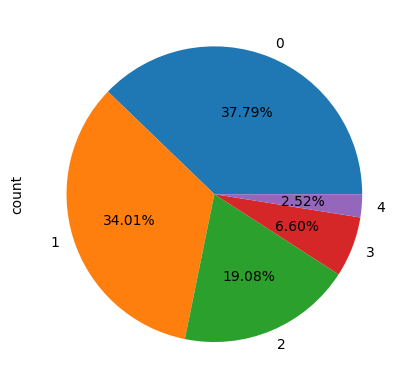

In [35]:
record_df ['label'].value_counts(dropna=False).plot(kind='pie', autopct='%.2f%%')

In [36]:
record_df.to_csv(filtered_grade_fp / 'image_path.csv')

In [37]:
for i, r in record_df.iterrows():
    src = r['raw_img']
    dst = r['filtered_img']
    shutil.copy(src=src, dst=dst)

In [38]:
# check length

In [43]:
len(list(image_filtered_grade_fp.iterdir())), len(record_df)

(1667, 1667)